In [29]:
#store data
import numpy as np
import pandas as pd
#visualize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline



In [34]:
diamond = pd.read_csv('/content/diamonds.csv', error_bad_lines=False)
print(diamond.shape)
diamond.head()



(67617, 11)


<ipython-input-34-7619592b3619>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  diamond = pd.read_csv('/content/diamonds.csv', error_bad_lines=False)
Skipping line 20238: expected 11 fields, saw 15



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4.0,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
diamond.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         1
price         1
x             1
y             1
z             1
dtype: int64

In [38]:
diamond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,67617.000000,67617.000000,67617.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000
mean,31043.446141,0.751116,61.740271,57.426992,3487.746332,5.634947,5.639249,3.479615
std,16187.048213,0.498006,1.458081,2.250104,3681.149734,1.042701,1.064114,0.664628
min,1.000000,0.200000,3.810000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,16904.000000,0.410000,61.000000,56.000000,1052.000000,4.770000,4.780000,2.950000
50%,33809.000000,0.610000,61.800000,57.000000,2057.000000,5.480000,5.490000,3.370000
75%,45491.000000,1.010000,62.500000,59.000000,4500.250000,6.400000,6.390000,3.970000
max,53943.000000,62.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


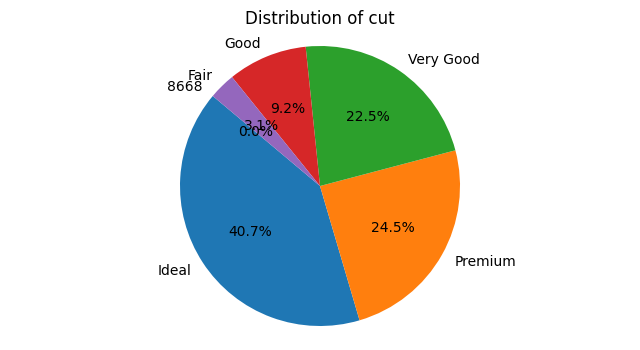

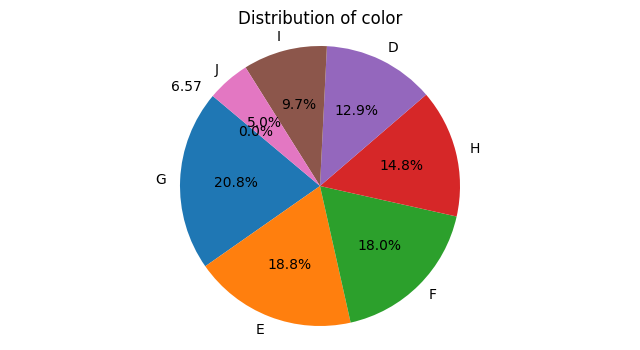

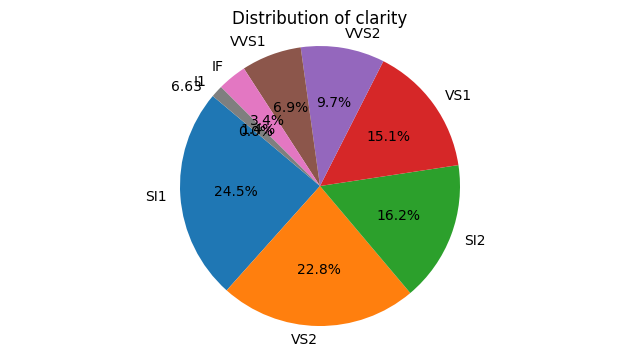

In [39]:
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))

    # Calculate value counts for the categorical variable
    value_counts = diamond[col].value_counts()

    # Create a pie chart
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

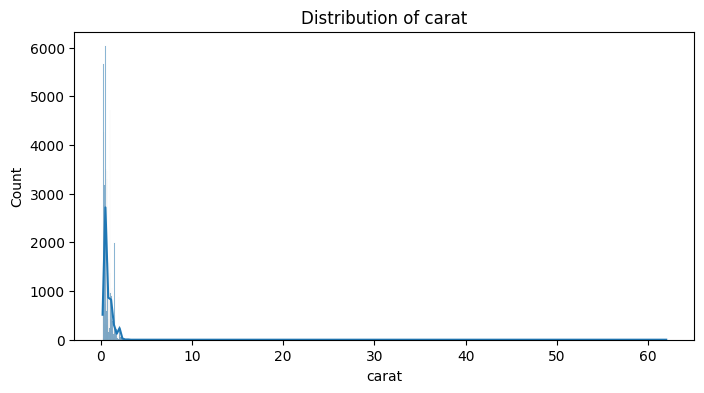

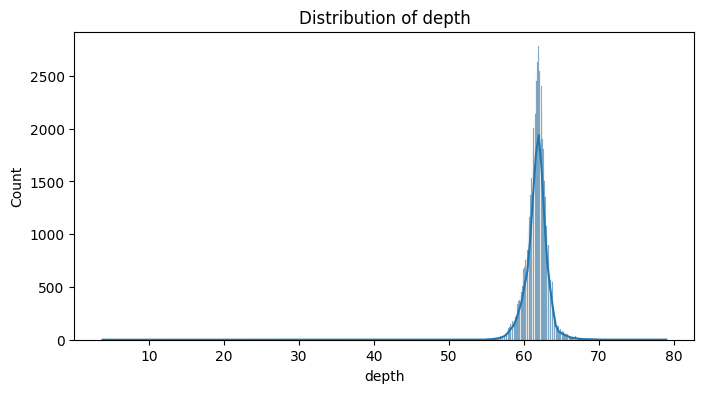

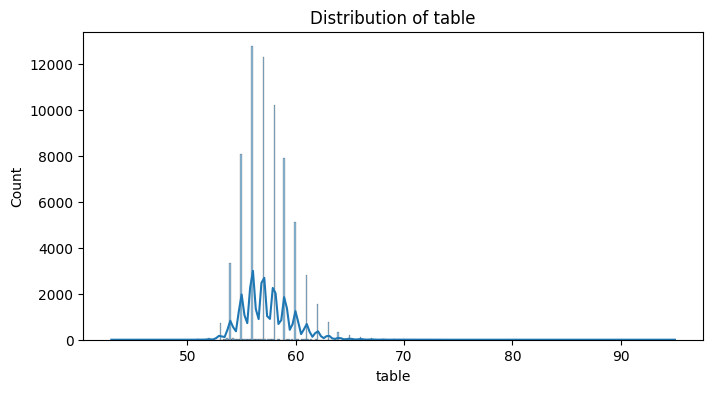

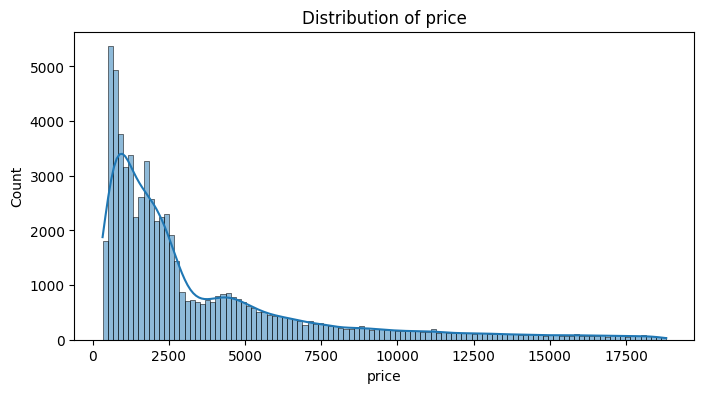

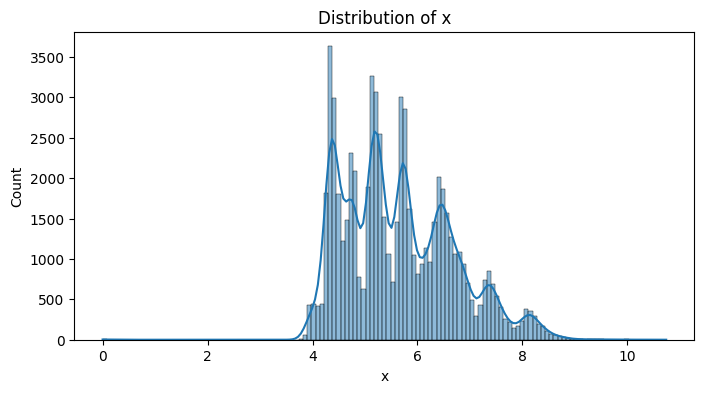

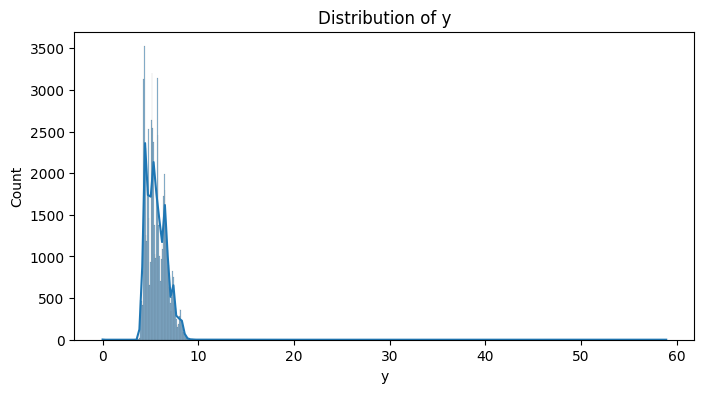

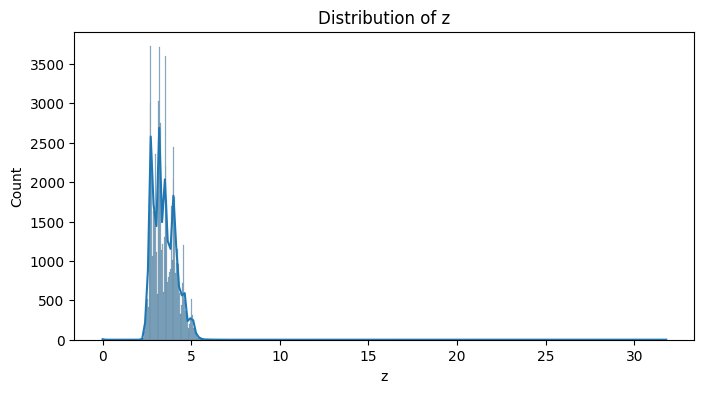

In [40]:

numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sb.histplot(diamond[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

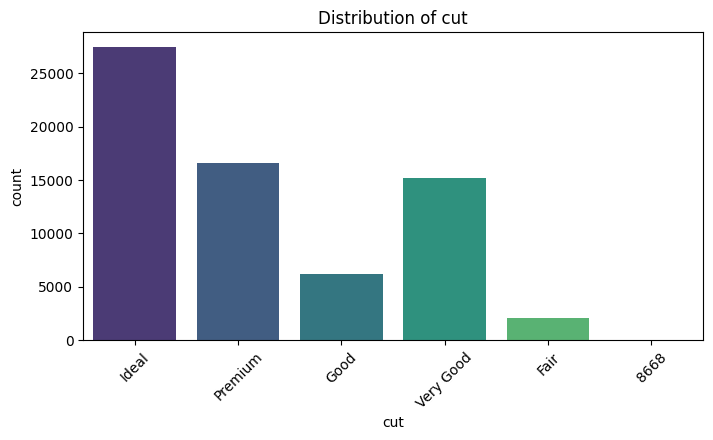

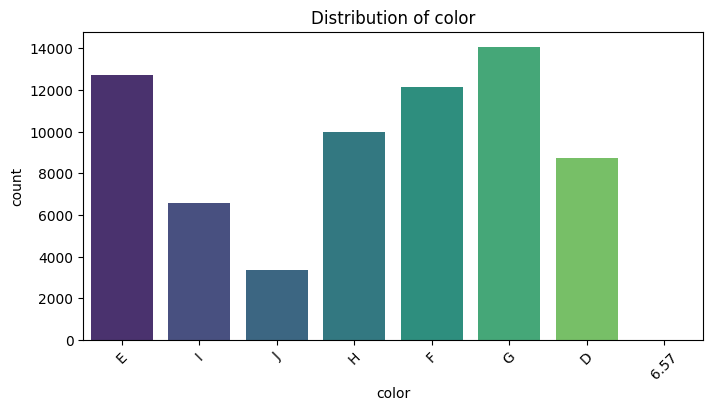

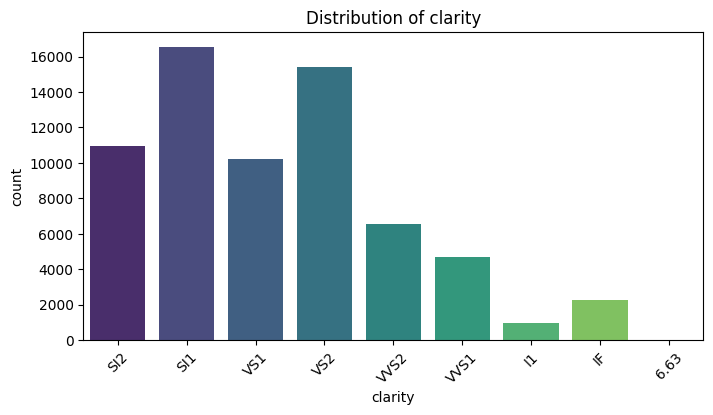

In [41]:
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sb.countplot(data=diamond, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

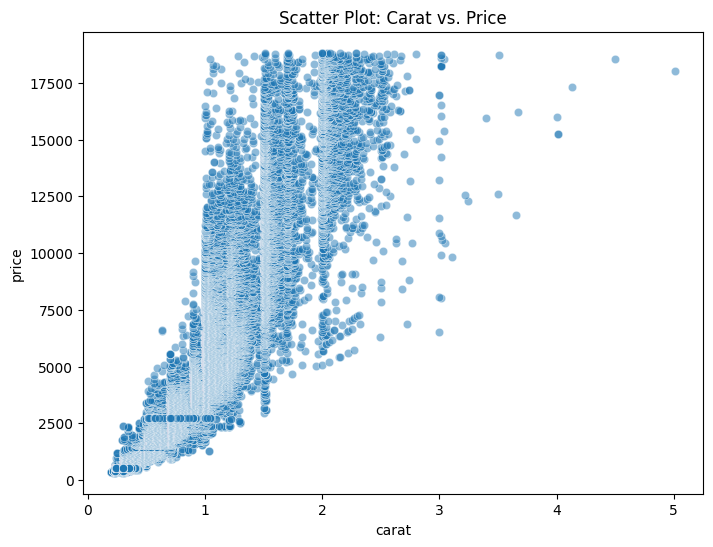

In [42]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=diamond, x='carat', y='price', alpha=0.5)
plt.title('Scatter Plot: Carat vs. Price')
plt.show()

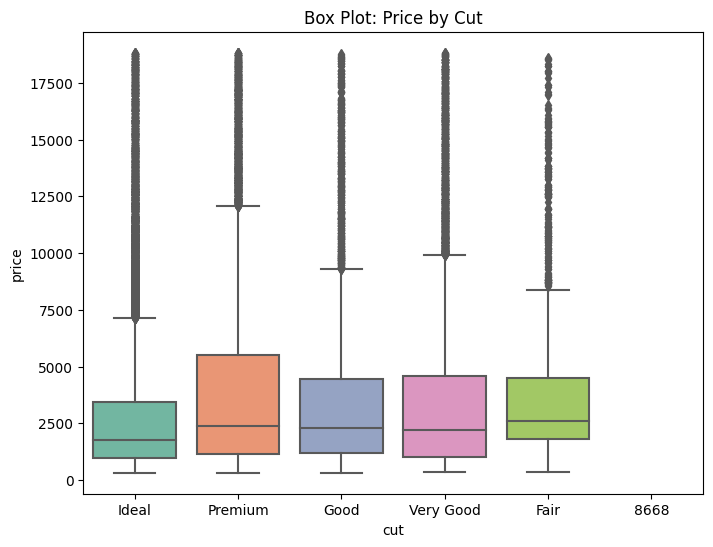

In [43]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=diamond, x='cut', y='price', palette='Set2')
plt.title('Box Plot: Price by Cut')
plt.show()

<ipython-input-44-ea589f0b11bf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = diamond.corr()


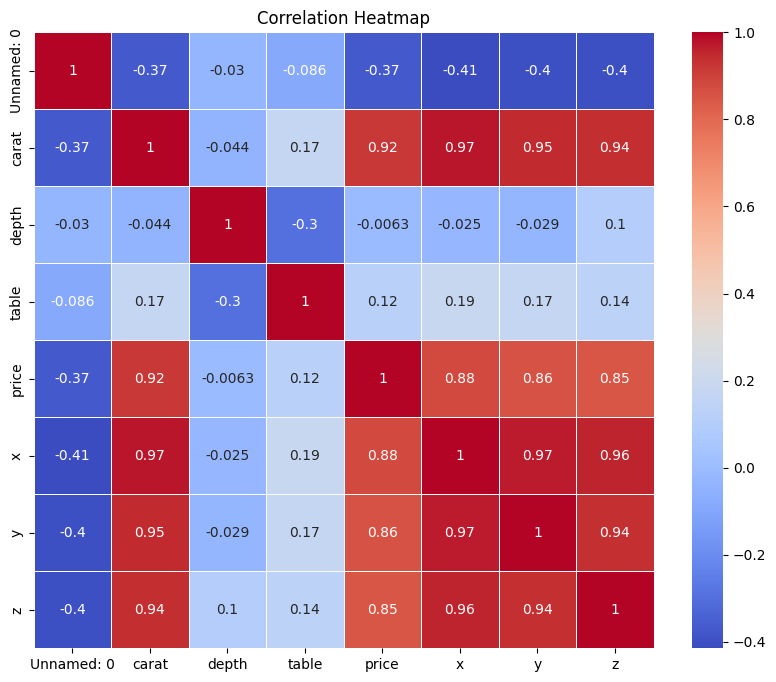

In [44]:
corr_matrix = diamond.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

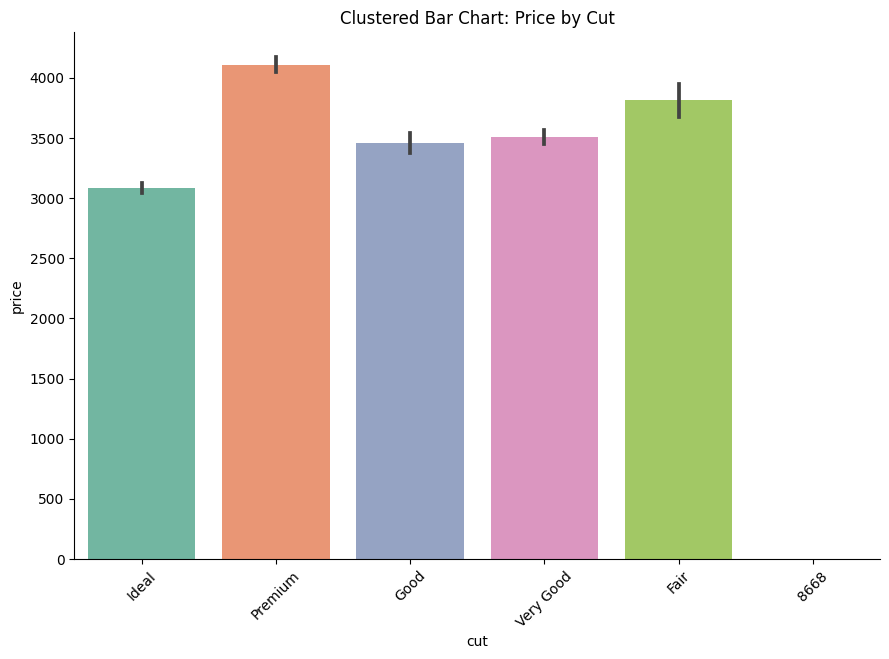

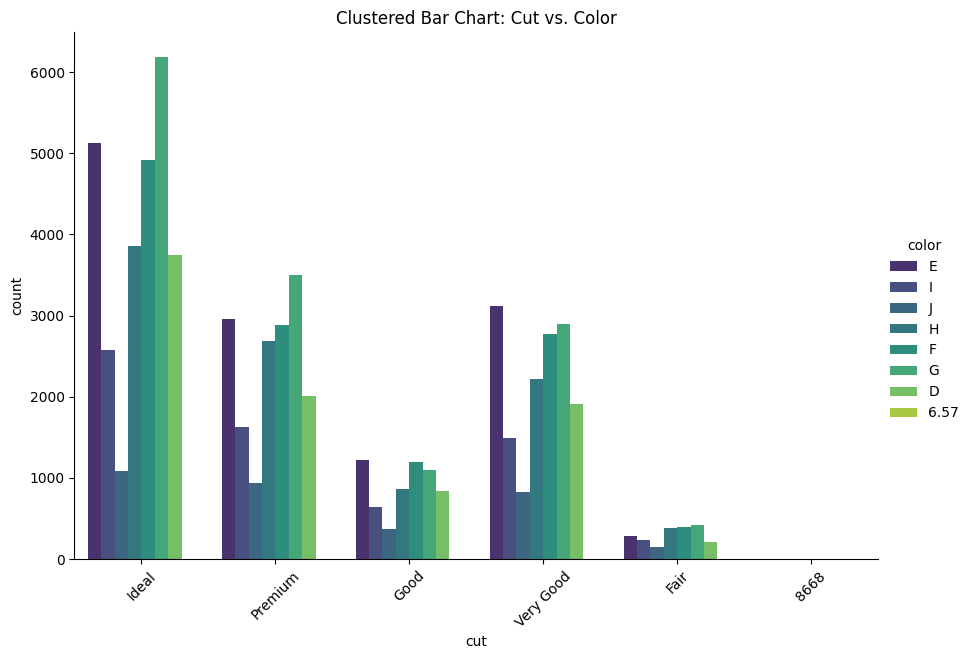

In [45]:
# Create a clustered bar chart to compare price by cut
sb.catplot(data=diamond, x='cut', y='price', kind='bar', palette='Set2', height=6, aspect=1.5)
plt.title('Clustered Bar Chart: Price by Cut')
plt.xticks(rotation=45)
plt.show()

# Create a clustered bar chart to visualize the relationship between cut and color
sb.catplot(data=diamond, x='cut', hue='color', kind='count', palette='viridis', height=6, aspect=1.5)
plt.title('Clustered Bar Chart: Cut vs. Color')
plt.xticks(rotation=45)
plt.show()

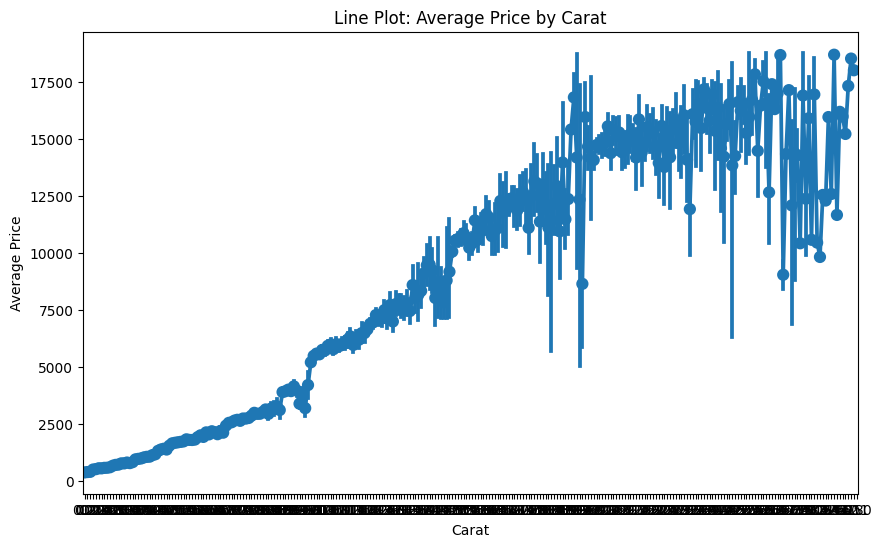

In [46]:
# Create a line plot
plt.figure(figsize=(10, 6))
sb.pointplot(data = diamond, x='carat' , y='price' )
plt.title('Line Plot: Average Price by Carat')
plt.xlabel('Carat')
plt.ylabel('Average Price')
plt.show()
